#Data Visualization III

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
file = pd.read_csv('./Iris.csv')

In [3]:
file.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
file.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

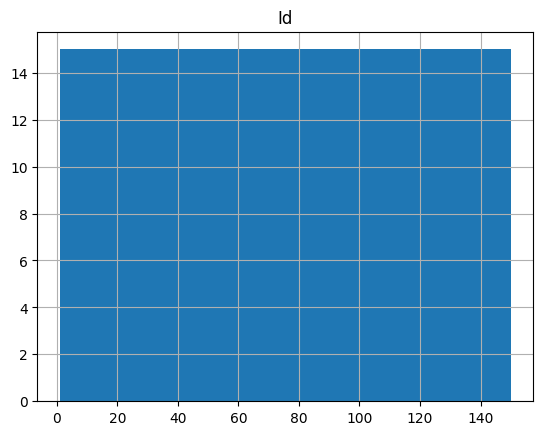

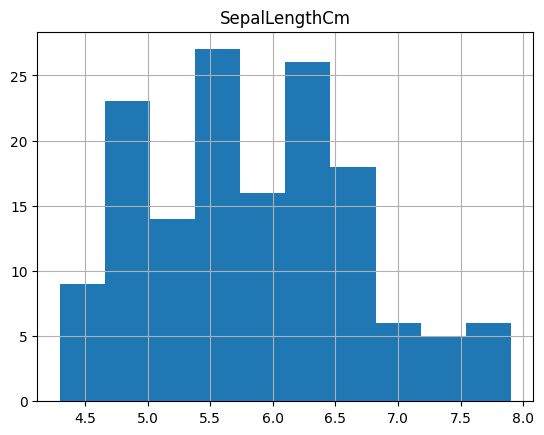

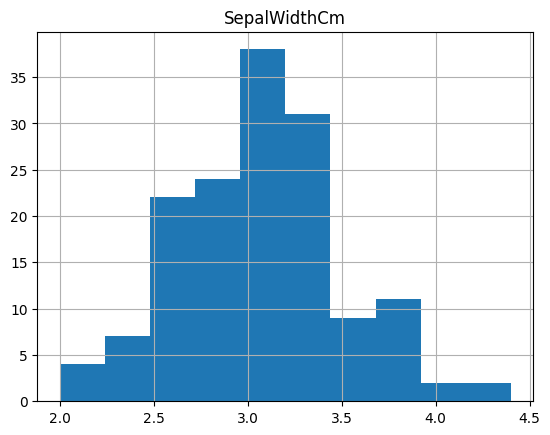

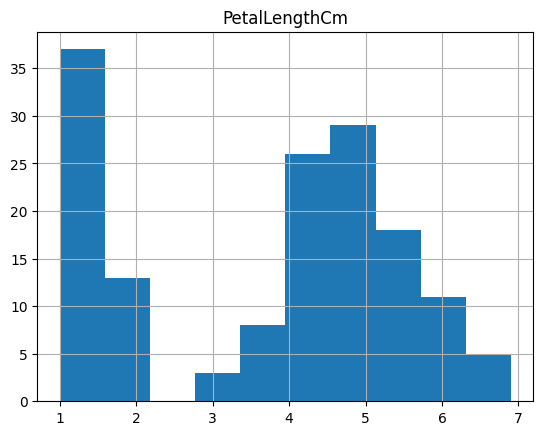

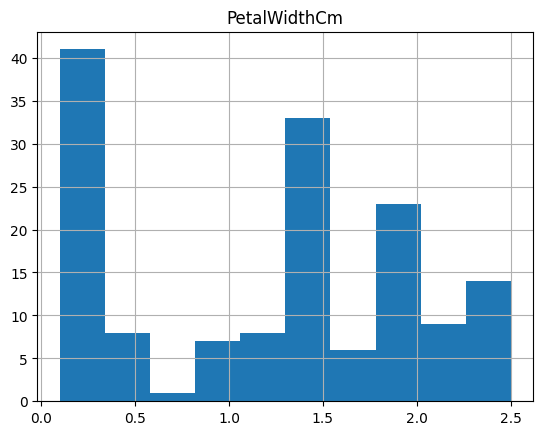

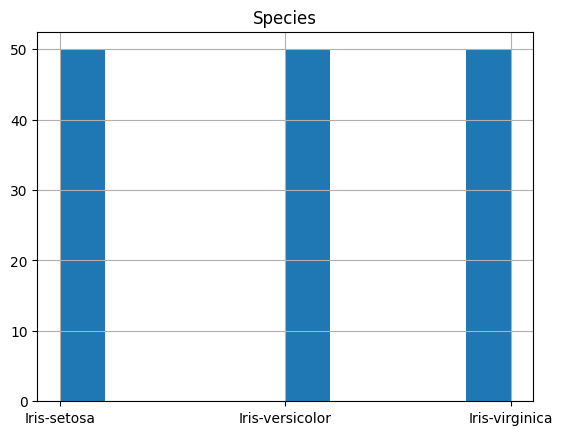

In [6]:
for column in file:
    plt.figure()
    file[column].hist()
    plt.title(column)
plt.show()

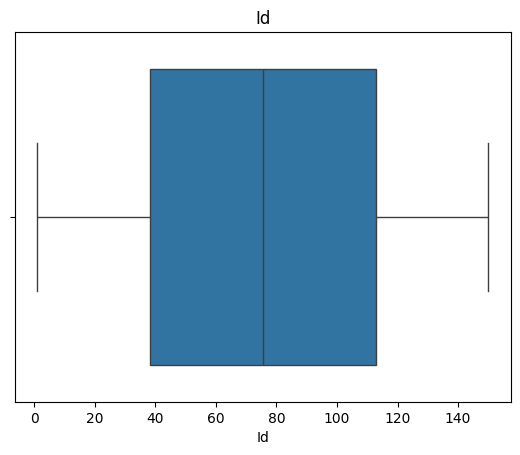

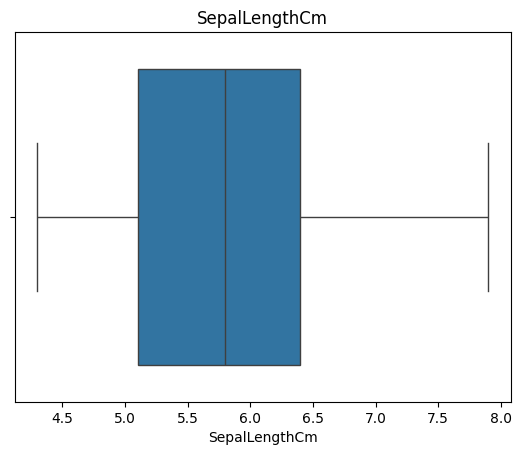

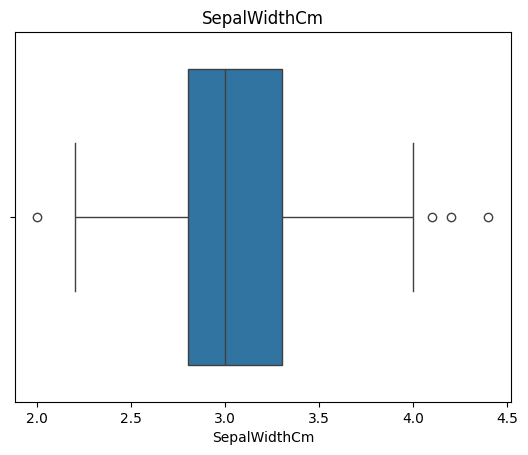

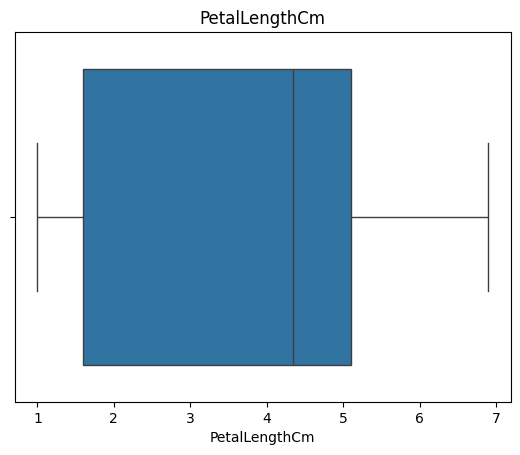

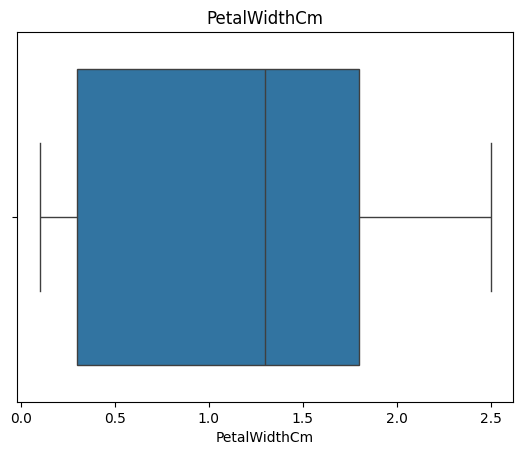

In [7]:
import seaborn as sns  
for column in file.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(x=file[column])
    plt.title(column)
plt.show()

In [8]:
for column in file.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = file[column].quantile(0.25) # First quartile (Q1)
    Q3 = file[column].quantile(0.75) # Third quartile (Q3)
    IQR = Q3 - Q1 # Interquartile range (IQR)

    # Define the range for outliers
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = file[(file[column] < lower_range) | (file[column] > upper_range)]

    # If there are any outliers, print them
    if not outliers.empty:
        print(f"Outliers in {column}:\n{outliers}\n")

Outliers in SepalWidthCm:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor  



In [10]:
file[column] = np.where((file[column] < lower_range) | (file[column] > upper_range), file[column].mean(), file[column])
file

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
